In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

spotify = pd.read_parquet("/content/drive/MyDrive/Colab Notebooks/TP3/parquet/train.parquet")

Mounted at /content/drive


In [2]:
spotify.at[18473, 'genre'] = "Children’s Music" #Arreglo una fila bug (género distinto por un caracter al resto).

Text(0.5, 0, 'Popularidad')

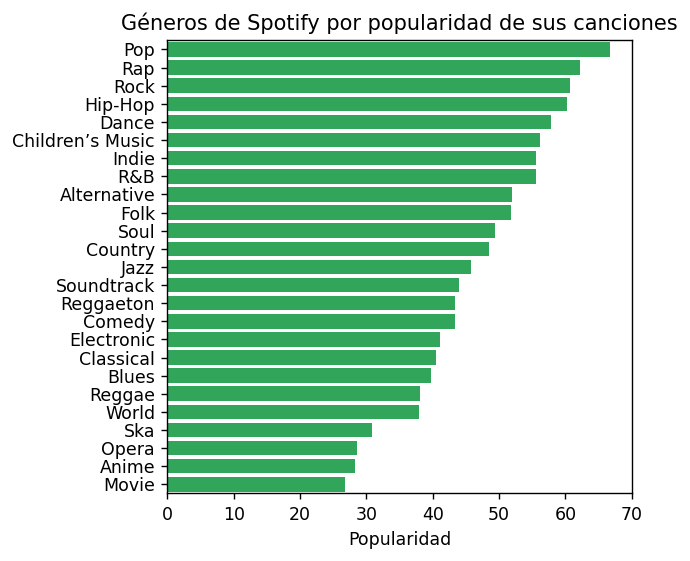

In [ ]:
#Queremos ordenar los géneros según el promedio de popularidad.
datos_visu1 = spotify[ ["genre", "popularity"] ]
datos_visu1 = datos_visu1.groupby(["genre"]).mean().reset_index().sort_values(by=['popularity'], ascending = False)

plt.figure(dpi=125,figsize=(4.8, 4.8))
sns.barplot(data=datos_visu1, x='popularity', y='genre', palette=['#1DB954'])
plt.title("Géneros de Spotify por popularidad de sus canciones")
plt.ylabel('')
plt.xlabel('Popularidad')

Text(0, 0.5, 'Valence')

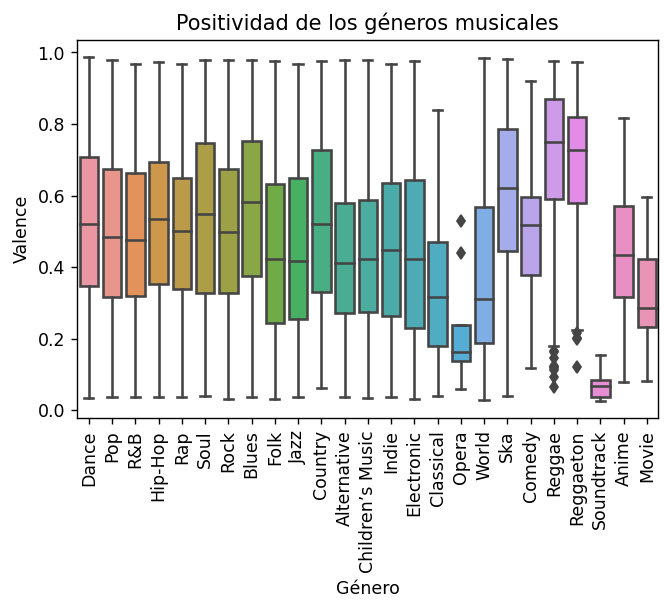

In [ ]:
#Positividad (valence) de los géneros musicales.
datos_visu2 = spotify[ ["genre", "valence"] ]

plt.figure(dpi=125)
sns.boxplot(data=datos_visu2, x='genre', y='valence')
plt.title("Positividad de los géneros musicales")
plt.xticks(rotation=90)
plt.xlabel("Género")
plt.ylabel("Valence")


Text(0.5, 0, 'Cantidad de canciones')

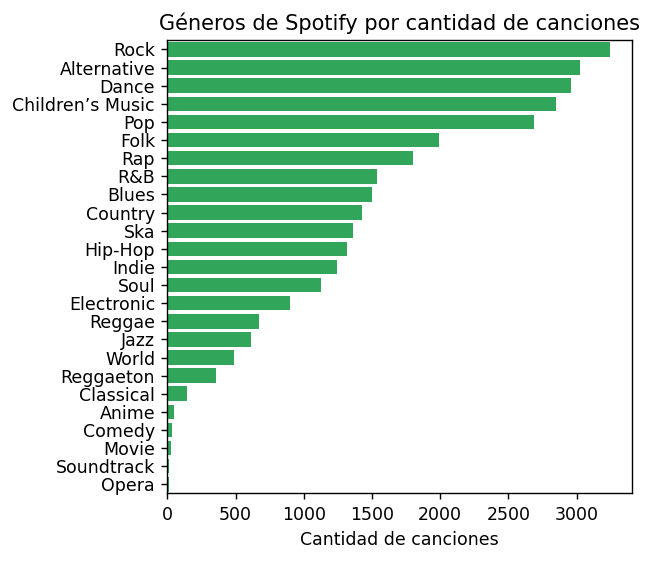

In [ ]:
#Queremos ordenar los géneros según la cantidad de canciones de c/u.
datos_visu3 = spotify[ ["genre", "duration_ms"] ]
datos_visu3 = datos_visu3.groupby(["genre"]).size().reset_index(name='counts').sort_values(by=['counts'], ascending = False)

plt.figure(dpi=125,figsize=(4.8, 4.8))
sns.barplot(data=datos_visu3, x='counts', y='genre', palette=['#1DB954'])
plt.title("Géneros de Spotify por cantidad de canciones")
plt.ylabel('')
plt.xlabel('Cantidad de canciones')


Text(0, 0.5, 'Loudness (dB)')

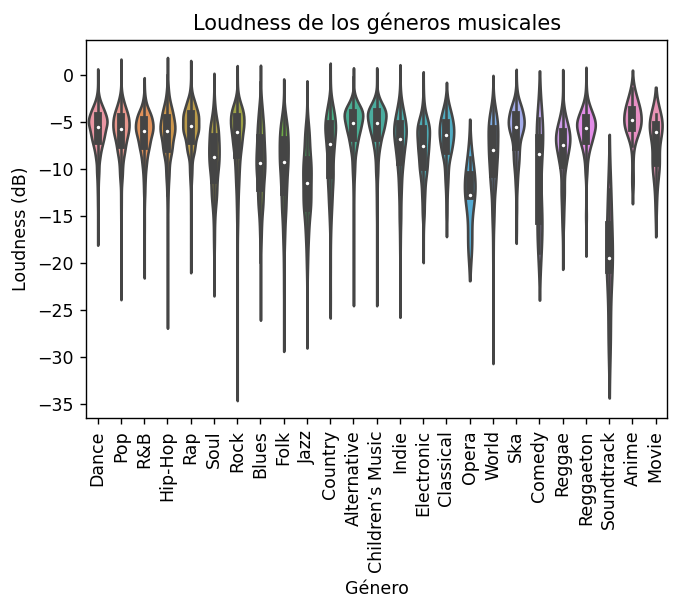

In [ ]:
#Loudness de los géneros musicales.
datos_visu4 = spotify[ ["genre", "loudness"] ]

plt.figure(dpi=125)
sns.violinplot(data=datos_visu4, x='genre', y='loudness')
plt.title("Loudness de los géneros musicales")
plt.xticks(rotation=90)
plt.xlabel("Género")
plt.ylabel("Loudness (dB)")


Text(0.5, 0, 'Duración (segundos)')

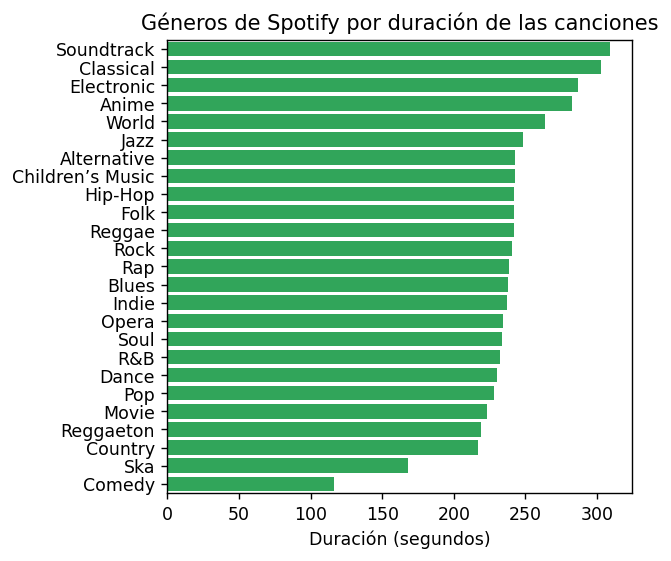

In [ ]:
#Queremos ordenar los géneros según la duración de sus canciones.
datos_visu5 = spotify[ ["genre", "duration_ms"] ]
datos_visu5 = datos_visu5.groupby(["genre"]).mean().div(1000).reset_index().sort_values(by=['duration_ms'], ascending = False)

plt.figure(dpi=125,figsize=(4.8, 4.8))
sns.barplot(data=datos_visu5, x='duration_ms', y='genre', palette=['#1DB954'])
plt.title("Géneros de Spotify por duración de las canciones")
plt.ylabel('')
plt.xlabel('Duración (segundos)')

Text(69.58333333333334, 0.5, '')

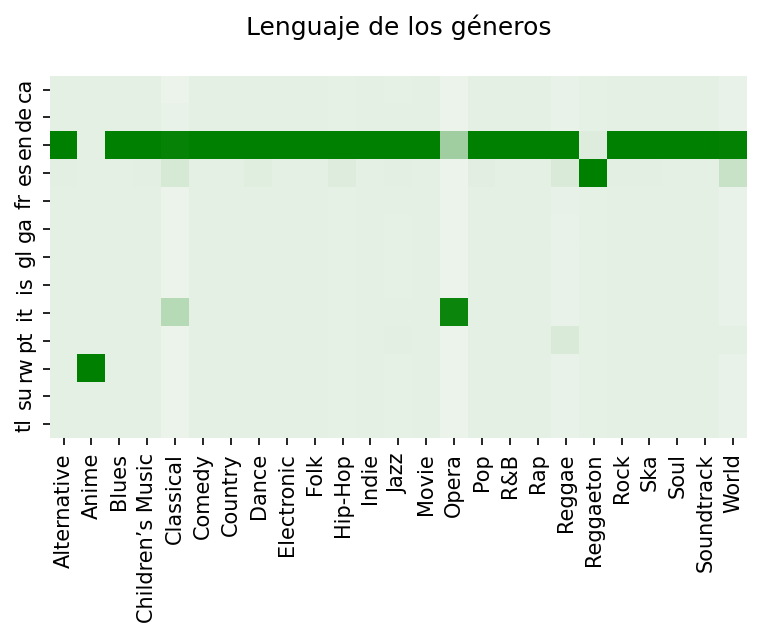

In [8]:
#Queremos ordenar los géneros según el promedio de popularidad.
datos_visu6 = spotify[ ["genre", "language"] ]
datos_visu6 = datos_visu6.pivot_table(index = 'language', columns = 'genre', aggfunc = len, fill_value = 0)
normalized_datos_visu6 = (datos_visu6-datos_visu6.mean()) / datos_visu6.std()

plt.figure(dpi=150)
plt.title("Lenguaje de los géneros\n")
sns.heatmap(normalized_datos_visu6, square=True, cmap=sns.light_palette("green", as_cmap=True), cbar=False)
plt.xlabel("")
plt.ylabel("")